#Proyecto Procesamiento de Lenguaje Natural :

#Clasificacion de generos musicales colombianos por medio del analisis de caracteristicas de sus letras

##Sergio Steven Lopez Martinez

##Imports de librerias a utilizar

In [ ]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa.display
import librosa as lb
import numpy as np
import sklearn
import os
from PIL import Image
from textblob import TextBlob
import pathlib
import csv
import pylab as pl
import nltk
import re, string, unicodedata
from unicodedata import normalize
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns  
%matplotlib inline

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

##Carga del dataset de letras de canciones de los 6 generos musicales(Cumbia, Carranga, Pasillo, Bambuco, Vallenato, Joropo) hechas manualmente

In [ ]:
#!wget -O Canciones.zip "https://drive.google.com/uc?export=download&id=1tf0p96LDQvl5VSagIq8lVRcgLXjDpxqq"
#!unzip Canciones.zip
!wget -O Canciones2.zip "https://drive.google.com/uc?export=download&id=1qKRg_UvylgVbo00fCSS6HhRWhgetsTYb"
!unzip Canciones2.zip

--2019-07-17 04:58:37--  https://drive.google.com/uc?export=download&id=1qKRg_UvylgVbo00fCSS6HhRWhgetsTYb
Resolving drive.google.com (drive.google.com)... 74.125.141.100, 74.125.141.113, 74.125.141.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.141.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-40-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0b29arlc7k9ak3fp2auu632jeo9kd29c/1563336000000/10519510251368043159/*/1qKRg_UvylgVbo00fCSS6HhRWhgetsTYb?e=download [following]
--2019-07-17 04:58:37--  https://doc-0g-40-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0b29arlc7k9ak3fp2auu632jeo9kd29c/1563336000000/10519510251368043159/*/1qKRg_UvylgVbo00fCSS6HhRWhgetsTYb?e=download
Resolving doc-0g-40-docs.googleusercontent.com (doc-0g-40-docs.googleusercontent.com)... 74.125.141.132, 2607:f8b0:400c:c06::84
Connecting to doc-0g-40-docs.googleusercontent.com (doc-0g

In [ ]:
!ls -la Canciones

total 736
drwxr-xr-x 2 root root 12288 Jul 17 04:58 .
drwxr-xr-x 1 root root  4096 Jul 17 03:59 ..
-rw-r--r-- 1 root root  1173 Jul 16 18:45 Bambuco01.txt
-rw-r--r-- 1 root root   806 Jul 16 18:41 Bambuco02.txt
-rw-r--r-- 1 root root   743 Jul 16 18:46 Bambuco03.txt
-rw-r--r-- 1 root root   905 Jul 16 18:42 Bambuco04.txt
-rw-r--r-- 1 root root   961 Jul 14 21:11 Bambuco05.txt
-rw-r--r-- 1 root root  1037 Jul 14 21:11 Bambuco06.txt
-rw-r--r-- 1 root root   656 Jul 14 21:11 Bambuco07.txt
-rw-r--r-- 1 root root   610 Jul 14 21:11 Bambuco08.txt
-rw-r--r-- 1 root root   721 Jul 14 21:11 Bambuco09.txt
-rw-r--r-- 1 root root   730 Jul 14 14:48 Bambuco10.txt
-rw-r--r-- 1 root root   501 Jul 16 07:43 Bambuco11.txt
-rw-r--r-- 1 root root   458 Jul 16 07:44 Bambuco12.txt
-rw-r--r-- 1 root root  1062 Jul 16 07:44 Bambuco13.txt
-rw-r--r-- 1 root root   938 Jul 16 07:45 Bambuco14.txt
-rw-r--r-- 1 root root   565 Jul 16 07:55 Bambuco15.txt
-rw-r--r-- 1 root root   732 Jul 16 07:59 Bambuco16.txt
-rw-r

##Funciones de preprocesamiento de los datos(tokenizacion, remover stop words, lematizacion, normalizacion en general)

In [ ]:
def normalize_tildes(string):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        string = string.replace(a, b).replace(a.upper(), b.upper())
    return string

def remove_non_ascii(words):
    """Remover caracteres que son son ASCII de la lista de palabras tokenizadas"""
    new_words = []
    for word in range(len(words)):
        #new_word = unicodedata.normalize('NFKD', words[word]).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_word = unicodedata.normalize('NFD', words[word]).encode('utf-8').decode('ascii', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convierte todos los caracteres a minuscula de una lista de tokens"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remueve la puntuacion de una lista de tokens"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Reemplaza todos los numeros a su representacion textual"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remueve stopwords"""
    new_words = []
    for word in words:
      if len(word)>3:
        new_words.append(word)
      if word not in stopwords.words('spanish'):
        new_words.append(word)
    return new_words

def stem_words(words):
    """Stemmming de palabras de una lista de tokens"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """lemmatizacion a los verbos de una lista de tokens"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas
  
def stem(words):
    stems = stem_words(words)
    return stems
  
def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas
  
def normalize(words):
    words = to_lowercase(words)
    words = remove_non_ascii(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    words = lemmatize(words)
    return words
  
def normalizeStem(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    words = stem(words)
    return words

##Usando tf idf

In [ ]:
!mkdir Cleaned

mkdir: cannot create directory ‘Cleaned’: File exists


In [ ]:
for filename in os.listdir(f'./Canciones/'):
  file = open('data.csv', 'a', newline='')
  archivo = open(f'./Canciones/{filename}', "r", encoding='latin-1')
  content = nltk.word_tokenize(archivo.read())
  content = normalize(content)
  with open("Cleaned/"+filename, 'w') as l:
        l.write(str(content))
print ("\n\nNormalizacion de canciones completa.")



Normalizacion de canciones completa.


In [ ]:
def read_all_documents(root):
    labels = []
    docs = []
    for r, dirs, files in os.walk(root):
        for file in files:
            with open(os.path.join(r, file), "r", encoding='latin-1') as f:
                docs.append(f.read())
                labels.append(f'{file[:-6].replace(".", "")}')
    return dict([('docs', docs), ('labels', labels)])

In [ ]:
data = read_all_documents('Cleaned')
documents = data['docs']
labels = data['labels']

In [ ]:
documents

["['metiste', 'metiste', 'como', 'luz', 'bello', 'bello', 'sol', 'naciente', 'naciente', 'atraviesa', 'atraviesa', 'cristal', 'cristal', 'como', 'sombra', 'sombra', 'besa', 'besa', 'olas', 'olas', 'herir', 'herir', 'piel', 'piel', 'poquito', 'poquito', 'poco', 'llenaste', 'llenaste', 'ser', 'siento', 'siento', 'confianza', 'confianza', 'deseo', 'deseo', 'cambiar', 'cambiar', 'cada', 'cada', 'gota', 'gota', 'sangre', 'sangre', 'tengo', 'cabalga', 'cabalga', 'recuerdo', 'recuerdo', 'cada', 'cada', 'recuerdo', 'recuerdo', 'motivo', 'motivo', 'sincero', 'sincero', 'pa', 'quererte', 'quererte', 'mas', 'todo', 'sitio', 'sitio', 'cuerpo', 'cuerpo', 'siento', 'siento', 'algo', 'llevo', 'llevo', 'ta', 'formas', 'formas', 'parte', 'parte', 'grande', 'grande', 'tesoro', 'tesoro', 'intimidad', 'intimidad', 'eres', 'hoy', 'maaana', 'maaana', 'ayer', 'ayer', 'corazan', 'corazan', 'ansiedad', 'ansiedad', 'secreto', 'secreto', 'paz', 'sinceridad', 'sinceridad', 'alma', 'alma', 'sublime', 'sublime', 's

In [ ]:
labels

['Vallenato',
 'Joropo',
 'Carranga',
 'Cumbia',
 'Cumbia',
 'Carranga',
 'Vallenato',
 'Vallenato',
 'Joropo',
 'Bambuco',
 'Carranga',
 'Carranga',
 'Cumbia',
 'Cumbia',
 'Bambuco',
 'Carranga',
 'Cumbia',
 'Bambuco',
 'Bambuco',
 'Bambuco',
 'Joropo',
 'Bambuco',
 'Carranga',
 'Joropo',
 'Pasillo',
 'Bambuco',
 'Cumbia',
 'Vallenato',
 'Carranga',
 'Carranga',
 'Cumbia',
 'Pasillo',
 'Joropo',
 'Cumbia',
 'Pasillo',
 'Bambuco',
 'Carranga',
 'Vallenato',
 'Pasillo',
 'Cumbia',
 'Cumbia',
 'Joropo',
 'Pasillo',
 'Carranga',
 'Bambuco',
 'Joropo',
 'Carranga',
 'Carranga',
 'Carranga',
 'Bambuco',
 'Bambuco',
 'Joropo',
 'Bambuco',
 'Bambuco',
 'Joropo',
 'Joropo',
 'Carranga',
 'Carranga',
 'Pasillo',
 'Cumbia',
 'Joropo',
 'Bambuco',
 'Joropo',
 'Bambuco',
 'Pasillo',
 'Bambuco',
 'Vallenato',
 'Vallenato',
 'Vallenato',
 'Vallenato',
 'Carranga',
 'Carranga',
 'Vallenato',
 'Vallenato',
 'Joropo',
 'Pasillo',
 'Carranga',
 'Pasillo',
 'Pasillo',
 'Cumbia',
 'Cumbia',
 'Joropo',
 'C

##Si queremos contar ocurrencias de palabras podemos usar CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# crear la transformación
vectorizer = CountVectorizer()
# tokenizar y construir el vocabulario
vectorizer.fit(documents)
# resumen
print(vectorizer.vocabulary_)
# codificador de documentos
vector = vectorizer.transform(documents)
# resumir vector codificado
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'metiste': 2851, 'como': 1067, 'luz': 2661, 'bello': 541, 'sol': 4229, 'naciente': 3006, 'atraviesa': 442, 'cristal': 1255, 'sombra': 4246, 'besa': 549, 'olas': 3138, 'herir': 2237, 'piel': 3453, 'poquito': 3545, 'poco': 3513, 'llenaste': 2604, 'ser': 4150, 'siento': 4179, 'confianza': 1115, 'deseo': 1463, 'cambiar': 747, 'cada': 707, 'gota': 2117, 'sangre': 4068, 'tengo': 4411, 'cabalga': 686, 'recuerdo': 3826, 'motivo': 2941, 'sincero': 4203, 'pa': 3200, 'quererte': 3718, 'mas': 2787, 'todo': 4481, 'sitio': 4216, 'cuerpo': 1294, 'algo': 193, 'llevo': 2621, 'ta': 4334, 'formas': 2025, 'parte': 3297, 'grande': 2128, 'tesoro': 4431, 'intimidad': 2406, 'eres': 1810, 'hoy': 2281, 'maaana': 2664, 'ayer': 461, 'corazan': 1190, 'ansiedad': 308, 'secreto': 4094, 'paz': 3341, 'sinceridad': 4202, 'alma': 213, 'sublime': 4286, 'mal': 2698, 'tambian': 4353, 'bien': 566, 'vida': 4727, 'cautividad': 910, 'saber': 4026, 'futuro': 2066, 'contigo': 1170, 'placer': 3488, 'escenificas': 1822, 'felicida

##Si queremos calcular la frecuencias de términos y frecuencia inversa en documentos, usamos TfidfVectorizer, que facilita bastante la tarea

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# crear la transformación
vectorizer = TfidfVectorizer()
# tokenizar y construir vocabulario
vectorizer.fit(documents)
# resumir
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# documento codificado
vector = vectorizer.transform(documents)
# resumir vector codificado
print(vector.shape)
print(vector.toarray())

{'metiste': 2851, 'como': 1067, 'luz': 2661, 'bello': 541, 'sol': 4229, 'naciente': 3006, 'atraviesa': 442, 'cristal': 1255, 'sombra': 4246, 'besa': 549, 'olas': 3138, 'herir': 2237, 'piel': 3453, 'poquito': 3545, 'poco': 3513, 'llenaste': 2604, 'ser': 4150, 'siento': 4179, 'confianza': 1115, 'deseo': 1463, 'cambiar': 747, 'cada': 707, 'gota': 2117, 'sangre': 4068, 'tengo': 4411, 'cabalga': 686, 'recuerdo': 3826, 'motivo': 2941, 'sincero': 4203, 'pa': 3200, 'quererte': 3718, 'mas': 2787, 'todo': 4481, 'sitio': 4216, 'cuerpo': 1294, 'algo': 193, 'llevo': 2621, 'ta': 4334, 'formas': 2025, 'parte': 3297, 'grande': 2128, 'tesoro': 4431, 'intimidad': 2406, 'eres': 1810, 'hoy': 2281, 'maaana': 2664, 'ayer': 461, 'corazan': 1190, 'ansiedad': 308, 'secreto': 4094, 'paz': 3341, 'sinceridad': 4202, 'alma': 213, 'sublime': 4286, 'mal': 2698, 'tambian': 4353, 'bien': 566, 'vida': 4727, 'cautividad': 910, 'saber': 4026, 'futuro': 2066, 'contigo': 1170, 'placer': 3488, 'escenificas': 1822, 'felicida

In [ ]:
from pandas import DataFrame

##Dataset tfidf con los labels de clase añadidos

In [ ]:
df = pd.DataFrame(vector.toarray())
df.columns = vectorizer.get_feature_names()
df["labels"] = labels
df

,2x,aa,aaaaaaaay,aalza,aao,aaoranzas,aaoro,aaos,aapa,aay,abajo,abandona,abandonado,abandonao,abejas,abierta,abiertas,abierto,abiertos,abogados,abra,abraca,abrame,abraza,abrazado,abrazame,abrazandolo,abrazandome,abrazandote,abrazas,abrazo,abrazos,abre,abriendo,abrieron,abrigo,abril,abrir,absortos,absurdo,...,voluble,volva,volver,volvera,volvia,volvias,volvieron,volvio,volviste,votadon,vovia,voy,voz,vuela,vuelan,vuelo,vuelta,vuelva,vuelvas,vuelve,vuelveme,vuelven,vuelvo,vulnerable,yace,yeee,yegua,yerbas,yerbatero,yesme,yuca,zaina,zambombas,zapatea,zapato,zarpa,zarzas,zona,zumbarse,labels
0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Vallenato
1,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.100991,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Joropo
2,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Carranga
3,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Cumbia
4,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Cumbia
5,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,Carranga
6,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.019963,0.000000,0.0,0.0,0.000000,0

In [ ]:
import re
from collections import defaultdict

def tokens(doc):
    return (tok.lower() for tok in re.findall(r"\w+", doc))

def frequency(tokens):
    f = defaultdict(int)
    for token in tokens:
        f[token] += 1
    return f

def tokens_frequency(doc):
    return frequency(tokens(doc))

In [ ]:
vectorizer.vocabulary_

{'metiste': 2851,
 'como': 1067,
 'luz': 2661,
 'bello': 541,
 'sol': 4229,
 'naciente': 3006,
 'atraviesa': 442,
 'cristal': 1255,
 'sombra': 4246,
 'besa': 549,
 'olas': 3138,
 'herir': 2237,
 'piel': 3453,
 'poquito': 3545,
 'poco': 3513,
 'llenaste': 2604,
 'ser': 4150,
 'siento': 4179,
 'confianza': 1115,
 'deseo': 1463,
 'cambiar': 747,
 'cada': 707,
 'gota': 2117,
 'sangre': 4068,
 'tengo': 4411,
 'cabalga': 686,
 'recuerdo': 3826,
 'motivo': 2941,
 'sincero': 4203,
 'pa': 3200,
 'quererte': 3718,
 'mas': 2787,
 'todo': 4481,
 'sitio': 4216,
 'cuerpo': 1294,
 'algo': 193,
 'llevo': 2621,
 'ta': 4334,
 'formas': 2025,
 'parte': 3297,
 'grande': 2128,
 'tesoro': 4431,
 'intimidad': 2406,
 'eres': 1810,
 'hoy': 2281,
 'maaana': 2664,
 'ayer': 461,
 'corazan': 1190,
 'ansiedad': 308,
 'secreto': 4094,
 'paz': 3341,
 'sinceridad': 4202,
 'alma': 213,
 'sublime': 4286,
 'mal': 2698,
 'tambian': 4353,
 'bien': 566,
 'vida': 4727,
 'cautividad': 910,
 'saber': 4026,
 'futuro': 2066,
 'c

In [ ]:
from sklearn.feature_extraction import DictVectorizer, FeatureHasher

vectorizer = DictVectorizer()
vectorizer.fit_transform(tokens_frequency(d) for d in documents)

vectorizer.get_feature_names()

['2x',
 'aa',
 'aaaaaaaay',
 'aalza',
 'aao',
 'aaoranzas',
 'aaoro',
 'aaos',
 'aapa',
 'aay',
 'abajo',
 'abandona',
 'abandonado',
 'abandonao',
 'abejas',
 'abierta',
 'abiertas',
 'abierto',
 'abiertos',
 'abogados',
 'abra',
 'abraca',
 'abrame',
 'abraza',
 'abrazado',
 'abrazame',
 'abrazandolo',
 'abrazandome',
 'abrazandote',
 'abrazas',
 'abrazo',
 'abrazos',
 'abre',
 'abriendo',
 'abrieron',
 'abrigo',
 'abril',
 'abrir',
 'absortos',
 'absurdo',
 'abuelo',
 'abuelos',
 'abundancia',
 'aca',
 'acaba',
 'acabado',
 'acabaria',
 'acabaste',
 'acabe',
 'acabes',
 'acabo',
 'acacias',
 'acarambas',
 'acaricia',
 'acariciando',
 'acarqueme',
 'acaso',
 'acechaba',
 'acepta',
 'aceptar',
 'aceptara',
 'aceptarlo',
 'acepte',
 'acercarse',
 'acercas',
 'acero',
 'acerquen',
 'acertado',
 'acibar',
 'acomodar',
 'acompaae',
 'acompana',
 'acondicionado',
 'acordarte',
 'acordeones',
 'acordeonistas',
 'acoste',
 'acostumbra',
 'acto',
 'actores',
 'actuar',
 'acuerdas',
 'acuerde'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer as tfid

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=4, norm='l2', encoding='latin-1', ngram_range=(1, 2), strip_accents='ascii')

X_train = tfidf.fit_transform(documents).toarray()
y_train = labels
X_train.shape

(180, 1156)

##Evaluacion de la seleccion del modelo usando cross_val_score de sklearn.model_selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [ ]:
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [ ]:
models = [
    KNeighborsClassifier(n_neighbors=10),
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 3
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

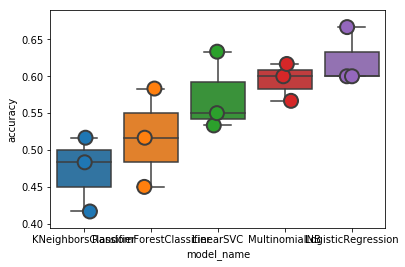

In [ ]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=14, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

model_name
KNeighborsClassifier      0.472222
LinearSVC                 0.572222
LogisticRegression        0.622222
MultinomialNB             0.594444
RandomForestClassifier    0.516667
Name: accuracy, dtype: float64

In [ ]:
X_train.shape

(180, 1156)

##Entrenando con el mejor modelo --> LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X_train, y_train, df.index, test_size=0.3, random_state=0, stratify =labels )

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto')
model.fit(X_train, y_train)

print('Accuracy: {}'.format(model.score(X_test, y_test)))
print('Error: {}'.format(1 - model.score(X_test, y_test)) + '\n')

y_pred = np.array(model.predict(X_test))

print(f'Etiquetas: {genres}' + '\n')
print('Precision: {}'.format(metrics.precision_score(y_test, y_pred, average=None)))
print('Recall:    {}'.format(metrics.recall_score(y_test, y_pred, average=None)))
print('F_1 score: {}'.format(metrics.f1_score(y_test, y_pred, average=None))+ '\n')

Accuracy: 0.5370370370370371
Error: 0.4629629629629629

Etiquetas: ['bambuco', 'carranga', 'cumbia', 'joropo', 'pasillo', 'vallenato']

Precision: [0.4        0.625      1.         0.66666667 0.75       0.41176471]
Recall:    [0.66666667 0.55555556 0.44444444 0.44444444 0.33333333 0.77777778]
F_1 score: [0.5        0.58823529 0.61538462 0.53333333 0.46153846 0.53846154]



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
genres = 'bambuco carranga cumbia joropo pasillo vallenato'.split()

In [ ]:
mtrx = confusion_matrix(y_test, y_pred)
df1 = pd.DataFrame(mtrx, index=genres, columns=genres)
print('Matriz de confusión')
print(df1)

Matriz de confusión
           bambuco  carranga  cumbia  joropo  pasillo  vallenato
bambuco          6         1       0       0        0          2
carranga         1         5       0       0        1          2
cumbia           2         0       4       1        0          2
joropo           2         0       0       4        0          3
pasillo          3         1       0       1        3          1
vallenato        1         1       0       0        0          7


#Clustering

In [ ]:
from sklearn import cluster
from sklearn.cluster import KMeans
from wordcloud import WordCloud

In [ ]:
kmeans = cluster.KMeans(n_clusters = 6, init = 'k-means++', n_init = 10, tol = 0.0001, n_jobs = -1, random_state = 1)

###Eliminamos la columna de labels o etiquetas, pues estamos ahora clasificando mediante un algoritmo no supervisado

In [ ]:
df = df.drop(['labels'],axis=1)

In [ ]:
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

##los centroides de los clusters por palabra

In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = df.columns
centroids

,2x,aa,aaaaaaaay,aalza,aao,aaoranzas,aaoro,aaos,aapa,aay,abajo,abandona,abandonado,abandonao,abejas,abierta,abiertas,abierto,abiertos,abogados,abra,abraca,abrame,abraza,abrazado,abrazame,abrazandolo,abrazandome,abrazandote,abrazas,abrazo,abrazos,abre,abriendo,abrieron,abrigo,abril,abrir,absortos,absurdo,...,voltea,voluble,volva,volver,volvera,volvia,volvias,volvieron,volvio,volviste,votadon,vovia,voy,voz,vuela,vuelan,vuelo,vuelta,vuelva,vuelvas,vuelve,vuelveme,vuelven,vuelvo,vulnerable,yace,yeee,yegua,yerbas,yerbatero,yesme,yuca,zaina,zambombas,zapatea,zapato,zarpa,zarzas,zona,zumbarse
0,6.503784e-03,1.355253e-20,0.000000e+00,0.000000e+00,1.084202e-19,0.000000e+00,1.084202e-19,0.000000e+00,0.00000,0.000000e+00,1.084202e-19,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.421011e-20,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.000000e+00,5.421011e-20,-2.168404e-19,-1.084202e-19,-5.421011e-20,...,0.000000,1.084202e-19,0.000000e+00,-8.673617e-19,2.168404e-19,0.000000e+00,0.000000e+00,1.084202e-19,0.000000e+00,0.000000e+00,0.000000e+00,-1.084202e-19,-8.673617e-19,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-2.168404e-19,0.000000,4.336809e-19,0.000000e+00,1.084202e-19,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.421011e-20,0.000000e+00,1.084202e-19,-1.084202e-19,0.000000e+00,-1.084202e-19,-1.084202e-19,0.00000,0.000000e+00
1,1.084202e-19,9.728413e-04,0.000000e+00,2.764906e-03,7.906807e-03,5.529811e-03,1.084202e-19,4.672208e-02,0.00000,2.190287e-03,1.084202e-19,0.000000e+00,2.561272e-03,2.168404e-19,7.462116e-03,7.041182e-03,5.421011e-20,3.252607e-19,2.004229e-03,0.000000e+00,-1.084202e-19,0.000000e+00,-1.084202e-19,-5.421011e-20,-2.168404e-19,3.252607e-19,0.000000e+00,-6.505213e-19,-1.626303e-19,3.252607e-19,1.084202e-19,-4.336809e-19,0.000000e+00,3.252607e-19,0.00000,-3.252607e-19,4.371057e-03,-2.168404e-19,1.084202e-19,-5.421011e-20,...,0.000000,1.084202e-19,-1.734723e-18,1.427966e-03,1.156035e-02,5.780174e-03,-1.626303e-19,6.197677e-03,1.301043e-18,-2.168404e-19,1.084202e-19,0.000000e+00,1.122878e-03,4.336809e-19,0.003136,0.000000e+00,2.416792e-03,5.122545e-03,4.336809e-19,0.000000,-4.336809e-19,-2.168404e-19,1.084202e-19,0.000000,0.000000e+00,-3.252607e-19,0.000000e+00,9.462596e-03,3.252607e-19,3.252607e-19,6.239726e-03,3.891365e-03,2.764906e-03,1.084202e-19,2.168404e-19,0.000000e+00,3.252607e-19,7.176461e-03,0.00000,7.462116e-03
2,2.168404e-19,1.355253e-20,-5.421011e-20,-1.084202e-19,3.252607e-19,-2.168404e-19,1.084202e-19,0.000000e+00,0.00000,1.084202e-19,1.084202e-19,0.000000e+00,6.505213e-19,3.252607e-19,2.168404e-19,4.336809e-19,5.421011e-20,3.252607e-19,3.252607e-19,1.084202e-19,-2.168404e-19,-5.421011e-20,-2.168404e-19,3.777552e-03,-1.084202e-19,4.336809e-19,4.829784e-03,-6.505213e-19,-1.626303e-19,3.252607e-19,1.084202e-19,-4.336809e-19,1.038120e-02,4.336809e-19,0.00000,5.316566e-03,5.421011e-20,-2.168404e-19,0.000000e+00,-5.421011e-20,...,0.000000,1.084202e-19,-1.734723e-18,8.901859e-03,-6.505213e-19,4.336809e-19,-1.626303e-19,1.084202e-19,1.734723e-18,-2.168404e-19,2.168404e-19,1.084202e-19,1.174789e-02,4.919372e-03,0.000000,1.126310e-02,0.000000e+00,4.336809e-19,2.129651e-03,0.000000,-8.673617e-19,-2.168404e-19,1.084202e-19,0.004590,0.000000e+00,-4.336809e-19,-1.084202e-19,-4.336809e-19,4.336809e-19,4.336809e-19,0.000000e+00,5.421011e-20,-1.084202e-19,1.084202e-19,5.575988e-03,2.230395e-03,3.252607e-19,-1.084202e-19,0.00000,2.168404e-19
3,3.229415e-03,2.710505e-20,0.000000e+00,-5.421011e-20,2.168404e-19,-1.084202e-19,6.972337e-03,-8.673617e-19,0.00000,8.131516e-20,1.084202e-19,0.000000e+00,6.458829e-03,2.168404e-19,2.168404e-19,4.336809e-19,5.421011e-20,3.252607e-19,3.252607e-19,0.000000e+00,-1.084202e-19,0.000000e+00,-1.084202e-19,-5.421011e-2

##Palabras mas representativas por cluster

In [ ]:
for i in range(0, len(centroids)):
    print(centroids.loc[i,:].sort_values(ascending = False)[0:10])
    print("\n")

llevara      0.143212
pesares      0.140417
corazan      0.132159
felicidad    0.115542
cariao       0.101699
poquito      0.100005
maten        0.093181
importa      0.089971
caramba      0.088629
qua          0.071116
Name: 0, dtype: float64


caballo     0.092726
llanero     0.047087
aaos        0.046722
tres        0.040633
si          0.039704
enamorar    0.039174
dura        0.039171
maruja      0.039015
tendra      0.033913
mechones    0.033077
Name: 1, dtype: float64


fiesta        0.069154
tierra        0.063442
joropo        0.049944
montan        0.042601
cumbia        0.038420
bambuco       0.034229
danza         0.031996
colombiana    0.031222
bailando      0.028119
llega         0.027566
Name: 2, dtype: float64


adios      0.095712
piragua    0.086145
viejo      0.084185
amor       0.046820
sigue      0.044510
llanura    0.041412
flores     0.036182
muria      0.035014
alma       0.030342
amores     0.030128
Name: 3, dtype: float64


usted      0.084618
pena       0.043

##Representacion en nube de palabras

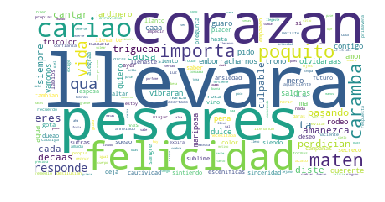

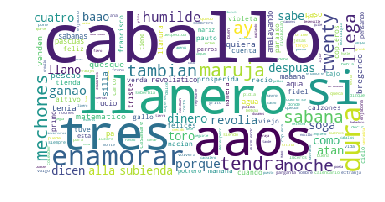

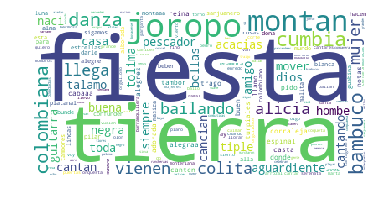

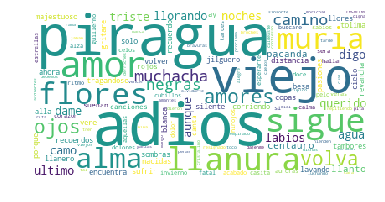

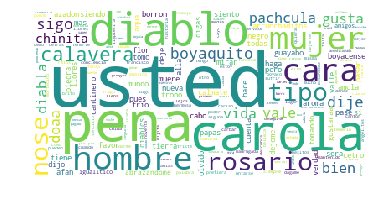

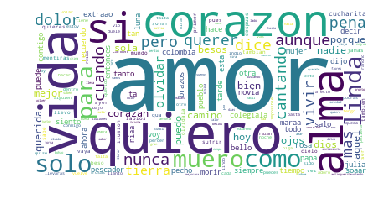

In [ ]:
for i in range(0, len(centroids)):
    wordcloud = WordCloud(background_color = 'white')
    kMeansWordCloud = wordcloud.generate_from_frequencies(dict(dict(centroids.T[i].reset_index().values)))
    plt.figure()
    plt.imshow(kMeansWordCloud)
    plt.axis("off")